Takes in .AWD, sleep log if it exists, calendar, and spits out some pretty pictures

In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, '/data/MoodGroup/actigraphy/gavi/actigraPy') 

import actigraPy.actigraPy as act
import importlib
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

/home/evansjw/.local/lib/python3.6/site-packages/matplotlib/backends/tkagg.py:10: MatplotlibDeprecationWarning: 
The matplotlib.backends.tkagg module is deprecated.
  "3.0", "The matplotlib.backends.tkagg module is deprecated.")


If you want to run the test data, run this cell instead of the one below

In [2]:
# data and log directories
sub = 'TEST' #subject NUMBER as STRING
sub_long = 'TEST'

out_dir = '/data/MoodGroup/actigraphy/gavi/actigraPy/data/output' #output directory
data_dir = '/data/MoodGroup/actigraphy/gavi/actigraPy/data'

if not os.path.exists(out_dir):
    os.mkdir(out_dir)


## Subject and directory info

In [3]:
fn = {}
#.AWD
awd_fn = os.path.join(data_dir, '%s.AWD'%sub_long)
#sleeplog
fn['cal']= os.path.join(data_dir, '%s_calendar_log.xls'%sub_long)
#calendar
fn['log'] = os.path.join(data_dir, '%s_sleeplog.xls'%sub_long)
logs = []

if os.path.isfile(awd_fn):
    for name in fn.keys():
        if os.path.isfile(fn[name]):
            print("%s has %s file at %s"%(sub,name,fn[name]))
            logs.append(fn[name])
        else:
            print("no " + name)
            fn[name] = ''
else:
    print("DO NOT CONTINUE!! THERE IS NO AWD FILE")

TEST has cal file at /data/MoodGroup/actigraphy/gavi/actigraPy/data/TEST_calendar_log.xls
TEST has log file at /data/MoodGroup/actigraphy/gavi/actigraPy/data/TEST_sleeplog.xls


### Make Mtimes file

Figure out where to clip awd file

In [5]:
awd_dat = act.read_AWD(awd_fn)


In [6]:
#read AWD file
awd_dat = act.read_AWD(awd_fn)
idx={'start':[0],'end':[len(awd_dat['dt_list'])-1]}
#get the start and stops from each log if they exist
for log in logs:
    print(log)
    _, kw_dat = act.read_log(log,awd_dat)
    
    if 'watch_on' in kw_dat.keys():
        on_date = kw_dat['watch_on'].iloc[0]['OnDate']
        on_time = kw_dat['watch_on'].iloc[0]['OnTime']
        on = datetime(on_date.year,on_date.month,on_date.day,on_time.hour,on_time.minute)
        #check if that time is in dt_list:
        if awd_dat['dt_list'].count(on) > 0:
            on_idx=awd_dat['dt_list'].index(on)
            idx['start'].append(on_idx)

    if 'watch_off' in kw_dat.keys():
        off_date = kw_dat['watch_off'].iloc[0]['OffDate']
        off_time = kw_dat['watch_off'].iloc[0]['OffTime']
        off = datetime(off_date.year,off_date.month,off_date.day,off_time.hour,off_time.minute)
        if awd_dat['dt_list'].count(off) > 0:
            off_idx=awd_dat['dt_list'].index(off)
            idx['end'].append(off_idx)
 
idx

/data/MoodGroup/actigraphy/gavi/actigraPy/data/TEST_calendar_log.xls
     OffDate   OffTime     OnDate    OnTime                Comment
0        NaT       NaN 2016-02-08  10:00:00                  start
1 2016-02-07  13:00:00 2016-02-07  14:30:00  Fake, for bug testing
2 2016-02-08  13:00:00 2016-02-08  14:30:00                     3T
3 2016-02-08  21:30:00 2016-02-09  07:00:00            Sleep study
4 2016-02-09  14:00:00 2016-02-09  16:00:00                     7T
5 2016-02-10  10:00:00 2016-02-10  12:00:00                    NaN
6 2016-02-10  21:30:00 2016-02-11  07:00:00            Sleep study
7 2016-02-11  09:00:00 2016-02-11  09:40:00               Infusion
8 2016-02-11  15:00:00 2016-02-11  17:00:00                    MEG
/data/MoodGroup/actigraphy/gavi/actigraPy/data/TEST_sleeplog.xls
     OffDate   OffTime     OnDate    OnTime Comment
0        NaT       NaN 2016-02-08  15:40:00   start
1 2016-02-09  00:42:00 2016-02-09  01:20:00  shower
2 2016-02-09  13:45:00 2016-02-09  16:35

{'start': [0, 144], 'end': [4741]}

In [7]:
start = max(idx['start'])
end = min(idx['end'])
print('start = %d, end = %d'%(start,end))

start = 144, end = 4741


In [8]:
awd_dat


{'hdr': {'sub': '\ufeffMLLE',
  'start_date': '08-Feb-2016',
  'start_time': '13:16',
  'unknown': '4',
  'age': '30',
  'watch': 'V637285',
  'gender': 'M'},
 'activity': array([308, 515,  84, ...,   2,  23,   7]),
 'M': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',

## <font color='red'>Make sure the starts and ends make sense before clipping the data</font>


In [7]:
#modify these according to output from above!!
lim = [awd_dat['DateTime'][start],awd_dat['DateTime'][end]]
clip_dat = act.clip_dat(lim,awd_dat)

## Now just run these cells in order to extract comments and write Mtimes

In [8]:
importlib.reload(act)
#Make master mk_idx
mk_idx=act.get_markers(awd_dat,fn['log'])

     OffDate   OffTime     OnDate    OnTime Comment
0        NaT       NaN 2016-02-08  15:40:00   start
1 2016-02-09  00:42:00 2016-02-09  01:20:00  shower
2 2016-02-09  13:45:00 2016-02-09  16:35:00  7T MRI
3 2016-02-09  23:25:00 2016-02-10  00:05:00  shower
4 2016-02-10  19:15:00 2016-02-10  20:07:00  shower
5 2016-02-11  15:00:00 2016-02-11  17:00:00     MEG


In [9]:
importlib.reload(act)
#Make master mk_idx
mk_idx=act.get_markers(awd_dat)

In [10]:
importlib.reload(act)
#Read logs
for name in fn.keys():
    if os.path.isfile(fn[name]):
        log_dat,kw_dat= act.read_log(fn[name],awd_dat)
        mk_idx[name]=log_dat['idx']
        


     OffDate   OffTime     OnDate    OnTime                Comment
0        NaT       NaN 2016-02-08  10:00:00                  start
1 2016-02-07  13:00:00 2016-02-07  14:30:00  Fake, for bug testing
2 2016-02-08  13:00:00 2016-02-08  14:30:00                     3T
3 2016-02-08  21:30:00 2016-02-09  07:00:00            Sleep study
4 2016-02-09  14:00:00 2016-02-09  16:00:00                     7T
5 2016-02-10  10:00:00 2016-02-10  12:00:00                    NaN
6 2016-02-10  21:30:00 2016-02-11  07:00:00            Sleep study
7 2016-02-11  09:00:00 2016-02-11  09:40:00               Infusion
8 2016-02-11  15:00:00 2016-02-11  17:00:00                    MEG
     OffDate   OffTime     OnDate    OnTime Comment
0        NaT       NaN 2016-02-08  15:40:00   start
1 2016-02-09  00:42:00 2016-02-09  01:20:00  shower
2 2016-02-09  13:45:00 2016-02-09  16:35:00  7T MRI
3 2016-02-09  23:25:00 2016-02-10  00:05:00  shower
4 2016-02-10  19:15:00 2016-02-10  20:07:00  shower
5 2016-02-11  15:0

In [11]:
importlib.reload(act)
act.write_Mtimes(awd_dat,mk_idx,os.path.join(out_dir,sub_long))

,OnDate,OnTime,OffDate,OffTime,marker,Comment
0,08-Feb-16,01:16 PM,08-Feb-16,02:30 PM,cal,3T
1,08-Feb-16,01:16 PM,08-Feb-16,02:35 PM,z,
2,08-Feb-16,02:43 PM,08-Feb-16,03:31 PM,z,
3,08-Feb-16,03:49 PM,08-Feb-16,04:01 PM,z,
4,08-Feb-16,04:51 PM,08-Feb-16,05:03 PM,z,
5,08-Feb-16,06:35 PM,08-Feb-16,07:03 PM,z,
6,08-Feb-16,07:07 PM,08-Feb-16,07:45 PM,z,
7,08-Feb-16,09:30 PM,09-Feb-16,07:00 AM,cal,Sleep study
8,08-Feb-16,10:05 PM,08-Feb-16,10:23 PM,z,
9,08-Feb-16,10:29 PM,08-Feb-16,10:45 PM,z,


## Make graphs

In [12]:
plots = {}
for name in fn.keys():
    if name in mk_idx.keys():
        plots[name]=mk_idx[name]

4
08-Feb-16
0 643
plotting: 796,870 from cal
plotting: 1290,1439 from cal
09-Feb-16
644 2083
plotting: 0,420 from cal
plotting: 840,960 from cal
plotting: 42,80 from log
plotting: 825,995 from log
plotting: 1405,1439 from log
10-Feb-16
2084 3523
plotting: 600,720 from cal
plotting: 1290,1439 from cal
plotting: 0,5 from log
plotting: 1155,1207 from log
11-Feb-16
3524 4740
plotting: 0,420 from cal
plotting: 540,580 from cal
plotting: 900,1020 from cal
plotting: 900,1020 from log
Saving... /data/MoodGroup/actigraphy/gavi/actigraPy/data/output/TEST_M+logs.png
Done


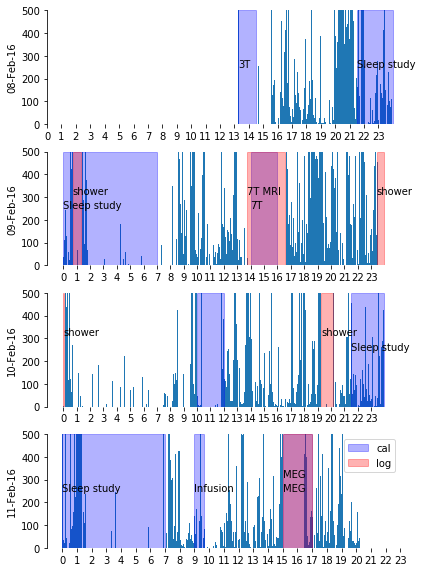

In [13]:
importlib.reload(act)

act.plot_awd(clip_dat,plots,max_act=500,show=False,fn_pref=os.path.join(out_dir,sub_long+'_M+logs'),plot_type='single',debug=True)


In [14]:
importlib.reload(act)

act.plot_awd(clip_dat,plots,max_act=250,show=False,comments=gc,fn_pref=os.path.join(out_dir,sub_long+'_M+logs_zoom'),plot_type='single',debug=True)


NameError: name 'gc' is not defined